In [1]:
import pandas as pd 
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import ast
import plotly.express as px
from wordcloud import WordCloud
import itertools
from itertools import combinations
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

df0 = pd.read_csv('C:/Users/mahar/OneDrive/Desktop/Dataset/dataset.csv')
df0_a = pd.read_csv('C:/Users/mahar/OneDrive/Desktop/Dataset/authors.csv')
df0_c = pd.read_csv('C:/Users/mahar/OneDrive/Desktop/Dataset/categories.csv')
df0_p = pd.read_csv('C:/Users/mahar/OneDrive/Desktop/Dataset/places.csv')
df0_f = pd.read_csv('C:/Users/mahar/OneDrive/Desktop/Dataset/formats.csv')

In [2]:
df0.rename(columns={'id' : 'book_id'} , inplace=True)
df0.columns

Index(['authors', 'bestsellers-rank', 'categories', 'description',
       'dimension-x', 'dimension-y', 'dimension-z', 'edition',
       'edition-statement', 'for-ages', 'format', 'book_id',
       'illustrations-note', 'image-checksum', 'image-path', 'image-url',
       'imprint', 'index-date', 'isbn10', 'isbn13', 'lang', 'publication-date',
       'publication-place', 'rating-avg', 'rating-count', 'title', 'url',
       'weight'],
      dtype='object')

In [3]:
df0_a.head()

,author_id,author_name
0,9561,NaN
1,451324,# House Press
2,454250,# Petal Press
3,249724,#GARCIA MIGUELE
4,287710,#Worldlcass Media


In [4]:
df0_c.head()

,category_id,category_name
0,1998,.Net Programming
1,176,20th Century & Contemporary Classical Music
2,3291,20th Century & Contemporary Classical Music
3,2659,20th Century History: C 1900 To C 2000
4,2661,21st Century History: From C 2000 -


In [5]:
df0_p.head()

,place_id,place_name


In [6]:
df0_f.head()

,format_id,format_name
0,21,Address
1,5,Audio
2,27,Bath
3,44,Big
4,14,Board


In [7]:
df0.isnull().sum()

authors                     0
bestsellers-rank       466842
categories                  0
description             80087
dimension-x             48227
dimension-y             93531
dimension-z             48227
edition                926569
edition-statement      749037
for-ages              1033390
format                   6622
book_id                     0
illustrations-note     753737
image-checksum             27
image-path                 27
image-url                  27
imprint                830049
index-date            1109383
isbn10                      0
isbn13                      0
lang                    60407
publication-date         2603
publication-place     1109383
rating-avg             440130
rating-count           440130
title                       0
url                         0
weight                  87173
dtype: int64

In [8]:
df0.dropna(subset=['description'] , inplace=True)

In [9]:
df0.isnull().sum()

authors                     0
bestsellers-rank       397620
categories                  0
description                 0
dimension-x             15873
dimension-y             47042
dimension-z             15873
edition                858141
edition-statement      686543
for-ages               961792
format                   2797
book_id                     0
illustrations-note     689288
image-checksum             27
image-path                 27
image-url                  27
imprint                766728
index-date            1029296
isbn10                      0
isbn13                      0
lang                    19872
publication-date          507
publication-place     1029296
rating-avg             384415
rating-count           384415
title                       0
url                         0
weight                  42600
dtype: int64

**Qualitative analysis of Number of books belonging to categories using word cloud.**

In [10]:
df = df0[[ 'book_id','categories' , 'description' , 'title']];
# Coverting string representation to list of integeres
df.loc[:, 'categories'] = df['categories'].apply(lambda x: ast.literal_eval(x))
df_merged = df.explode('categories').merge(df0_c , left_on='categories' , right_on='category_id' , how='left')

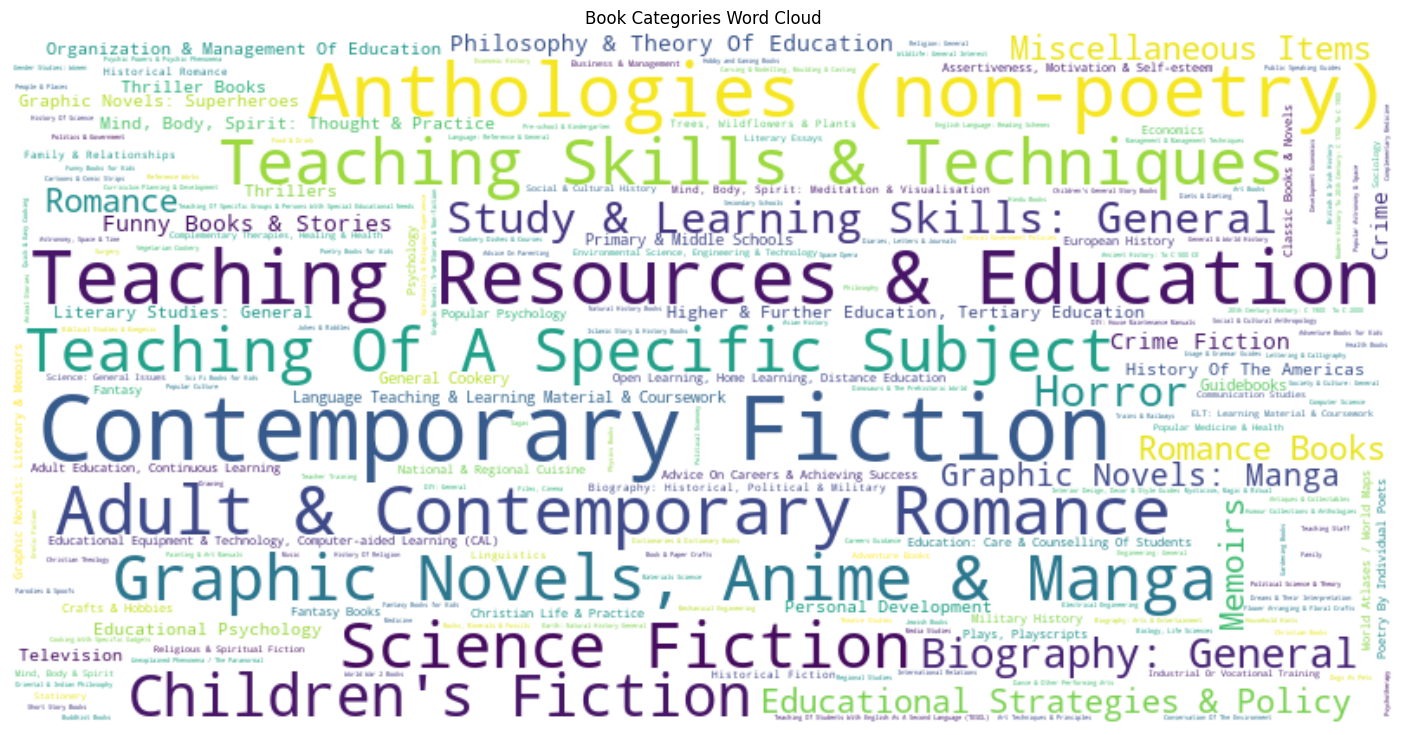

In [11]:
category_counts = df_merged['category_name'].value_counts().to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counts)

plt.figure(figsize=(18, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Book Categories Word Cloud')
plt.show()

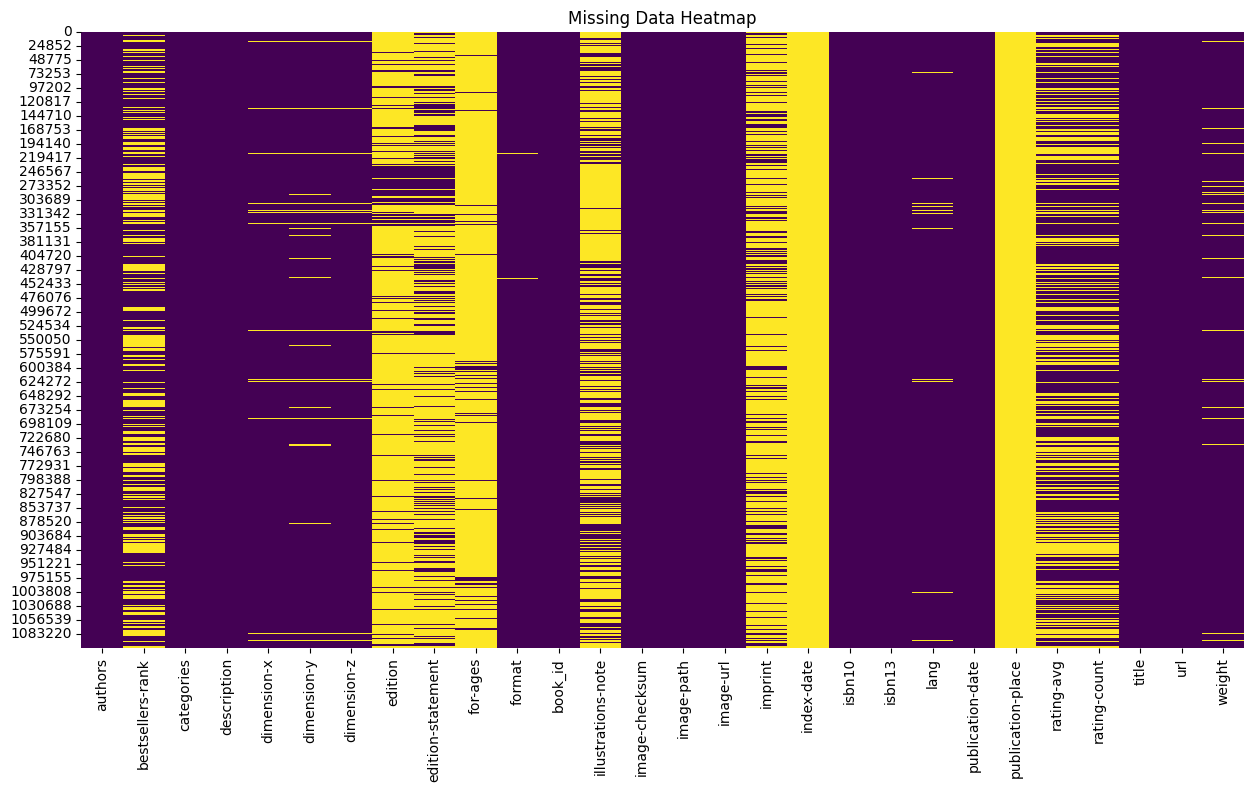

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(df0.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [20]:
df0.dropna(subset=['weight'] , inplace=True)
df0.dropna(subset=['dimension-x'] , inplace=True)
df0.dropna(subset=['dimension-y'] , inplace=True)
df0.dropna(subset=['dimension-z'] , inplace=True)
df0.dropna(subset=['format'] , inplace=True)
df0 = df0.merge(df0_f , left_on='format' , right_on='format_id')


In [22]:
filtered_df = df0.loc[df0['format_name'].isin(['Hardback' , 'Paperback' , 'CD' , 'Audio' , 'Calender' , 'Cards' , 'Spiral'])]
filtered_df = filtered_df[['book_id','dimension-x' , 'dimension-y' , 'dimension-z' , 'weight' , 'format' , 'format_name']]

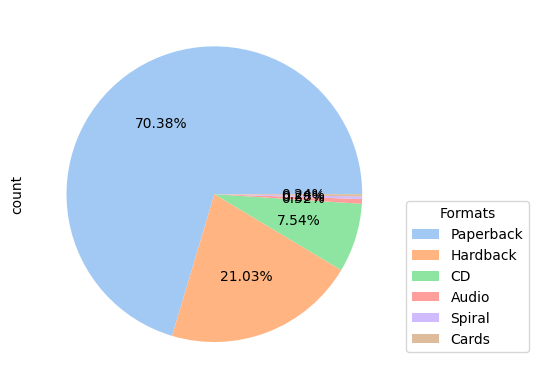

In [23]:
format_cnts = filtered_df['format_name'].value_counts()
piec_colors = sns.color_palette('pastel')[0:len(format_cnts)];
format_cnts.plot(kind = 'pie', colors=piec_colors , labels = None , autopct = '%1.2f%%')
plt.legend(format_cnts.index, title='Formats', loc='best', bbox_to_anchor=(1, 0.5))

# Display the pie chart
plt.show()

Around 98% of format is paperback, hardback and CD

In [24]:
filtered_df = filtered_df.loc[filtered_df['format_name'].isin(['Paperback' , 'Hardback' , 'CD'])]

In [25]:
X = filtered_df[['dimension-x', 'dimension-y', 'dimension-z', 'weight']]
y = filtered_df['format']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'C' : [0.1 , 1 , 10],
    'penalty': ['l2', 'l1'],
    'max_iter' : [500 , 1000 , 1500]
}

clf = LogisticRegression()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

In [28]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [500, 1000, 1500],
                         'penalty': ['l2', 'l1']},
             scoring='accuracy')

In [29]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'C': 1, 'max_iter': 500, 'penalty': 'l2'}


In [30]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.7833059210526315
              precision    recall  f1-score   support

         1.0       0.79      0.95      0.86    133415
         2.0       0.63      0.23      0.34     39648
         3.0       0.82      0.80      0.81     14201

    accuracy                           0.78    187264
   macro avg       0.75      0.66      0.67    187264
weighted avg       0.76      0.78      0.75    187264

